In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [219]:
data18 = pd.read_csv('Precipitation data(csv)/Preci18.csv')
data19 = pd.read_csv('Precipitation data(csv)/Preci19.csv')
data20 = pd.read_csv('Precipitation data(csv)/Preci20.csv')
data = pd.read_csv('Precipitation data(csv)/MasterData.csv')
data

,Unnamed: 0,Date,precipitationCal
0,0,2018-06-01 00:00:00,0.036
1,1,2018-06-01 00:30:00,0.056
2,2,2018-06-01 01:00:00,0.065
3,3,2018-06-01 01:30:00,0.051
4,4,2018-06-01 02:00:00,0.030
...,...,...,...
11995,11995,2020-08-10 21:30:00,1.841
11996,11996,2020-08-10 22:00:00,1.599
11997,11997,2020-08-10 22:30:00,2.377
11998,11998,2020-08-10 23:00:00,2.321


In [225]:
from numpy.fft import fft,fftfreq,ifft
n= 12000
freq = fftfreq(n)

In [226]:
mask = freq > 0

In [227]:
fft_val = fft(precipitation)
fft_val

array([5510.719        +0.j        , -765.1396548   +94.61261488j,
        537.99991679-1302.55871993j, ..., -415.69210647 -639.57391942j,
        537.99991679+1302.55871993j, -765.1396548   -94.61261488j])

In [228]:
true_fft = 2.0*np.abs(fft_val/n)

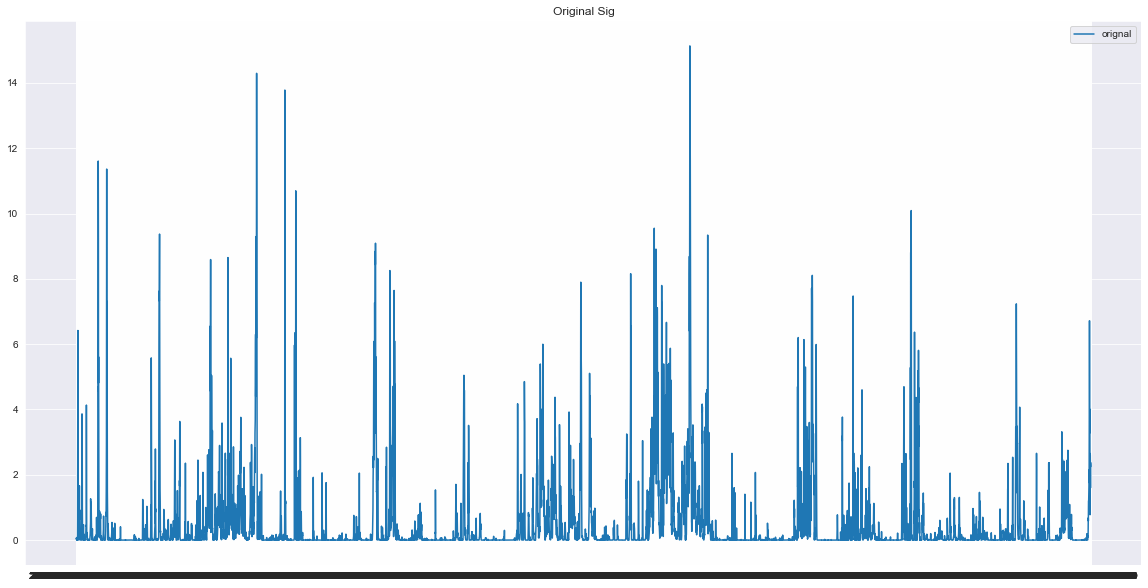

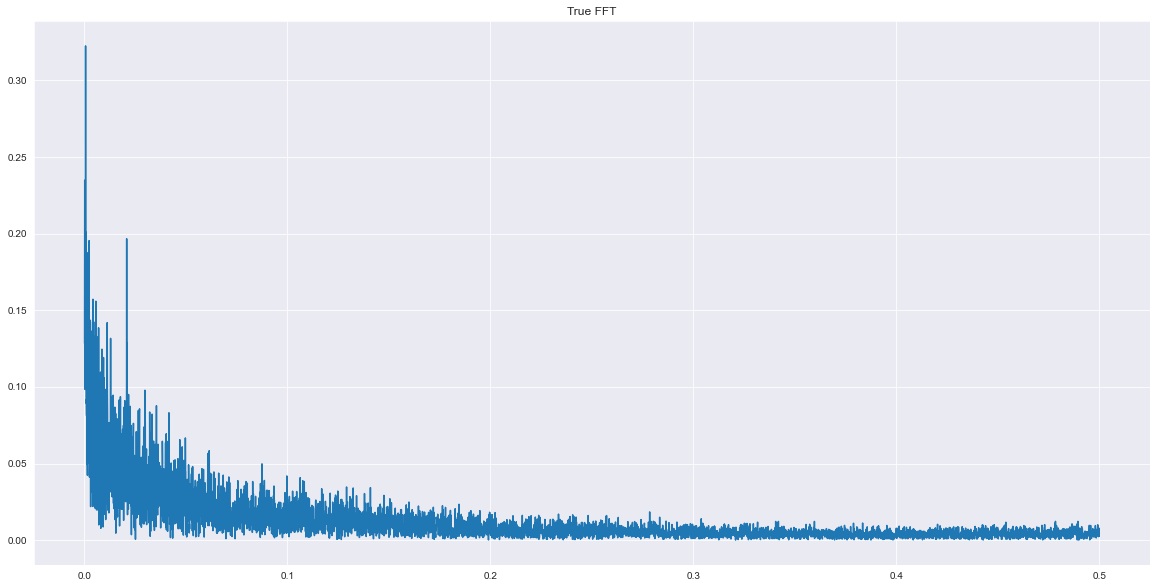

In [229]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(20,10))
plt.title('Original Sig')
plt.plot(data['Date'],data['precipitationCal'],label="orignal")
plt.legend()

plt.figure(2,figsize=(20,10))
plt.plot(freq[mask],true_fft[mask],label="True fft")
plt.title('True FFT')
plt.show()

In [18]:
true_fft[mask]

array([0.12849451, 0.23488195, 0.12713234, ..., 0.0028735 , 0.00795717,
       0.00262411])

In [19]:
freq[mask]

array([8.33333333e-05, 1.66666667e-04, 2.50000000e-04, ...,
       4.99750000e-01, 4.99833333e-01, 4.99916667e-01])

In [23]:
fft = pd.DataFrame(zip(freq[mask],true_fft[mask]))

In [25]:
fft.to_csv('fft_positive.csv')

In [26]:
fftm = pd.DataFrame(zip(freq,true_fft))
fftm

,0,1
0,0.000000,0.918453
1,0.000083,0.128495
2,0.000167,0.234882
3,0.000250,0.127132
4,0.000333,0.098428
...,...,...
11995,-0.000417,0.171918
11996,-0.000333,0.098428
11997,-0.000250,0.127132
11998,-0.000167,0.234882


In [208]:
data['Date'] = pd.to_datetime(data['Date'])

In [209]:
data.groupby(data['Date'].dt.date).sum()

,Unnamed: 0,precipitationCal
Date,,
2018-06-01,1128,43.867
2018-06-02,3432,23.741
2018-06-03,5736,12.271
2018-06-04,8040,11.675
2018-06-05,10344,1.659
...,...,...
2020-08-06,565608,5.504
2020-08-07,567912,0.014
2020-08-08,570216,0.064


In [210]:
df = data[(data['Date'].dt.year == 2019)]

In [211]:
df = df[(data['Date'].dt.month == 7)]

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [212]:
df = df.reset_index()

In [213]:
del df['index'],df['Unnamed: 0']

In [187]:
df['Date'] = pd.to_datetime(df['Date'])
df.groupby(df['Date'].dt.date).sum()
df

,Date,precipitationCal
0,2019-07-01 00:00:00,0.790
1,2019-07-01 00:30:00,1.385
2,2019-07-01 01:00:00,1.386
3,2019-07-01 01:30:00,1.582
4,2019-07-01 02:00:00,1.216
...,...,...
1483,2019-07-31 21:30:00,0.252
1484,2019-07-31 22:00:00,0.128
1485,2019-07-31 22:30:00,0.086
1486,2019-07-31 23:00:00,0.046


In [214]:
from numpy.fft import fft,fftfreq,ifft
n= 1488
freq = fftfreq(n)

In [215]:
mask = freq > 0

In [216]:
fft_val = fft(df['precipitationCal'])
fft_val

array([1252.032       +0.j        ,  548.61809936+298.28743425j,
        -59.07553554+401.79630286j, ..., -122.30981553-408.56200165j,
        -59.07553554-401.79630286j,  548.61809936-298.28743425j])

In [217]:
true_fft = 2.0*np.abs(fft_val/n)

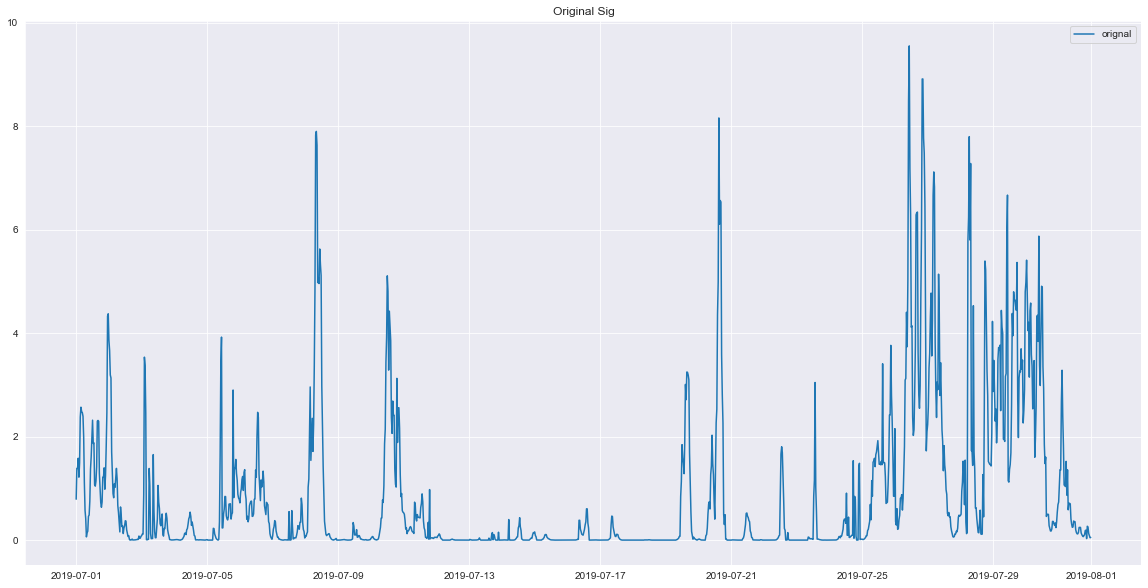

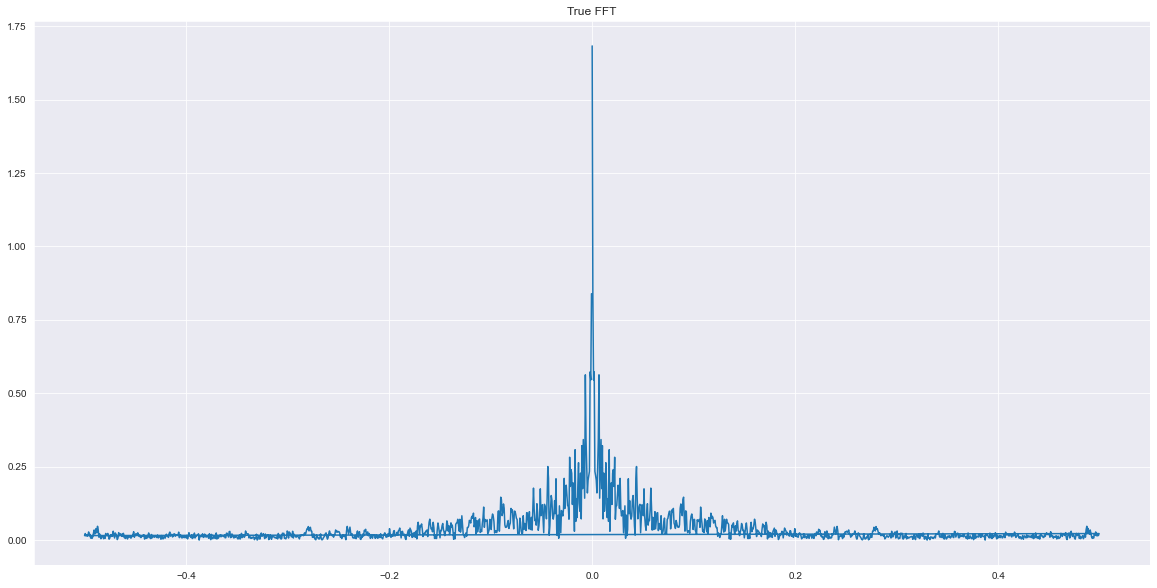

In [218]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(20,10))
plt.title('Original Sig')
plt.plot(df['Date'],df['precipitationCal'],label="orignal")
plt.legend()

plt.figure(2,figsize=(20,10))
plt.plot(freq,true_fft,label="True fft")
plt.title('True FFT')
plt.show()

In [198]:
df = df.groupby(df['Date'].dt.date).sum()

In [199]:
from numpy.fft import fft,fftfreq,ifft
n= 31
freq = fftfreq(n)

In [200]:
mask = freq > 0

In [201]:
fft_val = fft(df['precipitationCal'])
fft_val

array([1252.032       +0.j        ,  513.80181589+342.05555068j,
       -129.74177802+368.65029715j, -221.49989645+352.14658255j,
       -107.50440101-112.00392155j,  119.34903124 -87.23434822j,
        -37.51107572+148.82144028j,  -67.62413528 -58.62461299j,
        -78.7867755 -102.65642104j,    8.13526556-221.4077388j ,
        253.10345721-164.01974115j,   20.79816125 +34.67973529j,
        -34.49496177+137.57512679j,  137.30097089+131.70182629j,
        111.81909652-142.73139534j,    7.05522519-168.23846419j,
          7.05522519+168.23846419j,  111.81909652+142.73139534j,
        137.30097089-131.70182629j,  -34.49496177-137.57512679j,
         20.79816125 -34.67973529j,  253.10345721+164.01974115j,
          8.13526556+221.4077388j ,  -78.7867755 +102.65642104j,
        -67.62413528 +58.62461299j,  -37.51107572-148.82144028j,
        119.34903124 +87.23434822j, -107.50440101+112.00392155j,
       -221.49989645-352.14658255j, -129.74177802-368.65029715j,
        513.80181589-342.

In [202]:
true_fft = 2.0*np.abs(fft_val/n)

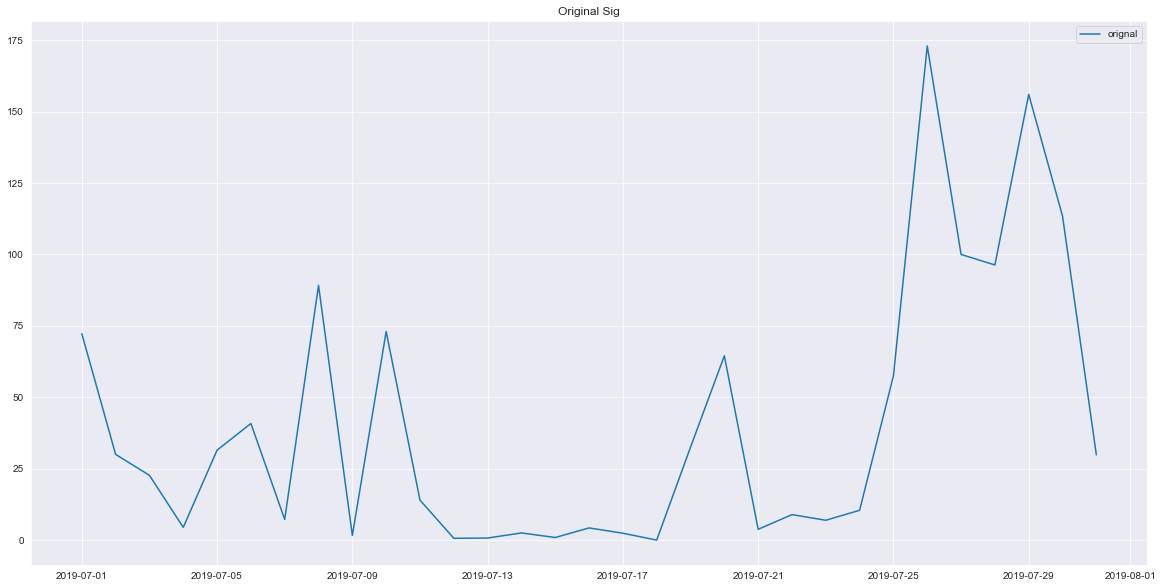

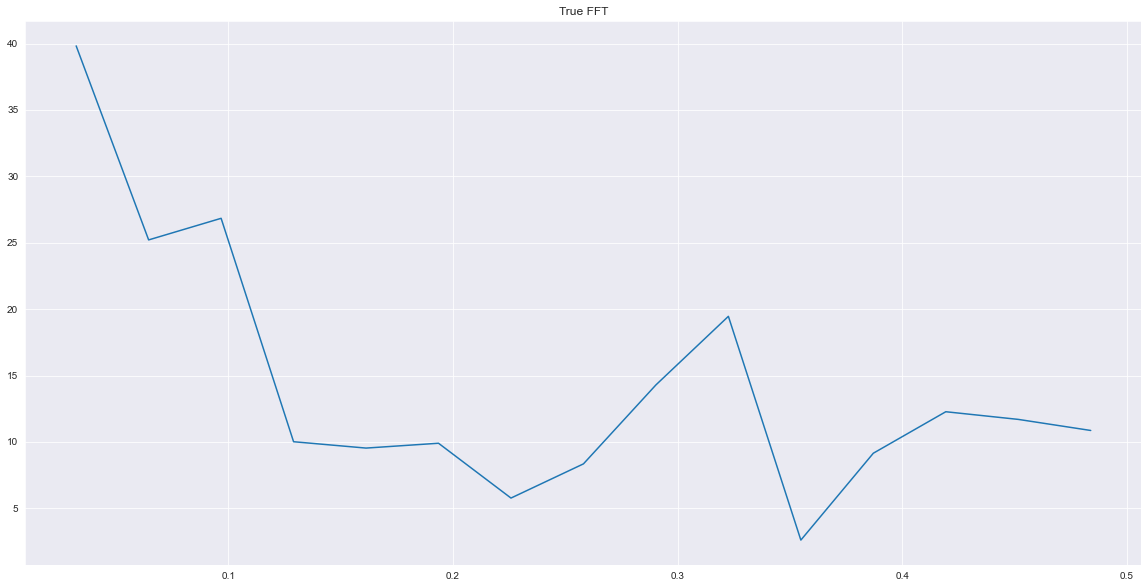

In [204]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(20,10))
plt.title('Original Sig')
plt.plot(df.index,df['precipitationCal'],label="orignal")
plt.legend()

plt.figure(2,figsize=(20,10))
plt.plot(freq[mask],true_fft[mask],label="True fft")
plt.title('True FFT')
plt.show()

In [188]:
n = 48
freq = fftfreq(n)

In [189]:
freq.shape

(48,)

In [190]:
N = (31-0)*n

In [191]:
time = np.linspace(0, 31, int(N))

In [192]:
df

,Date,precipitationCal
0,2019-07-01 00:00:00,0.790
1,2019-07-01 00:30:00,1.385
2,2019-07-01 01:00:00,1.386
3,2019-07-01 01:30:00,1.582
4,2019-07-01 02:00:00,1.216
...,...,...
1483,2019-07-31 21:30:00,0.252
1484,2019-07-31 22:00:00,0.128
1485,2019-07-31 22:30:00,0.086
1486,2019-07-31 23:00:00,0.046


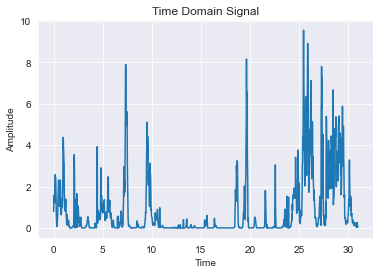

In [193]:
plt.plot (time, df['precipitationCal'])
plt.title ('Time Domain Signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.show ()

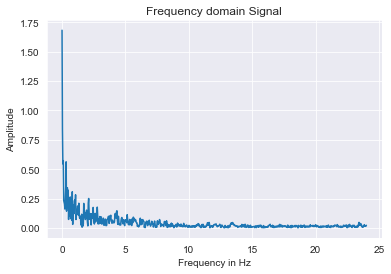

In [197]:
from numpy.fft import fft,fftfreq,ifft
frequency = np.linspace (0.0, 24, int (N/2))
freq_data = fft(df['precipitationCal'])
y = 2/N * np.abs (freq_data [0:np.int (N/2)])
plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()